# Tri par insertion

## Principe

Pour un tableau de $n$ éléments, le tri par insertion 

* parcourt le tableau du $2^{ieme}$ au $n^{ieme}$ élément. 
* insère l'élément courant $k$ dans la partie du tableau déjà triée $[0:k-1]$

Pour insérer, il déplace d'une position vers la droite tous les éléments strictement plus grands que l'élément à insérer, ce qui libère une position pour l'insertion.

## Boucle interne

Le coeur de l'algorithme consiste à insérer l'élément d'indice $k$ dans le tableau supposé déjà trié des éléments d'indices $0$ à $k-1$. 

* copier l'élément `k` dans une variable temporaire `tmp`
* tant que `tmp` est plus petit que l'élément précédent
  * déplacer cet élément vers la droite
  * reculer d'une position dans le tableau
* écrire `tmp` dans l'emplacement libéré.  

In [1]:
def inserer_un_element(T,k):
    tmp = T[k]
    i = k
    while i > 0 and tmp < T[i-1]: 
        T[i] = T[i-1]    
        i -= 1 
    T[i] = tmp

Un tableau de 1 élément est toujours trié. 

On commence donc par insérer le deuxième élément (d'indice 1) dans le tableau ne contenant que le premier élément

In [2]:
T = [ 5, 3, 8, 1, 4, 2, 7, 6 ]
inserer_un_element(T,1); print(T[:2],T[2:]) 

[3, 5] [8, 1, 4, 2, 7, 6]


Les deux premiers éléments sont maintenant triés. Insérons le troisième

In [3]:
inserer_un_element(T,2); print(T[:3],T[3:])

[3, 5, 8] [1, 4, 2, 7, 6]


Et ainsi de suite ... 

In [4]:
inserer_un_element(T,3); print(T[:4],T[4:])

[1, 3, 5, 8] [4, 2, 7, 6]


In [5]:
inserer_un_element(T,4); print(T[:5],T[5:])

[1, 3, 4, 5, 8] [2, 7, 6]


In [6]:
inserer_un_element(T,5); print(T[:6],T[6:])

[1, 2, 3, 4, 5, 8] [7, 6]


In [7]:
inserer_un_element(T,6); print(T[:7],T[7:])

[1, 2, 3, 4, 5, 7, 8] [6]


In [8]:
inserer_un_element(T,7); print(T[:8],T[8:])

[1, 2, 3, 4, 5, 6, 7, 8] []


## Boucle externe 

On répète donc l'insertion jusqu'à ce qu'on aie inséré tous les éléments

In [9]:
T = [ 5, 3, 8, 1, 4, 2, 7, 6 ]; N = len(T)
print(T[:1],T[1:])

for i in range(1,N):
    inserer_un_element(T,i)
    print(T[:i+1],T[i+1:])

[5] [3, 8, 1, 4, 2, 7, 6]
[3, 5] [8, 1, 4, 2, 7, 6]
[3, 5, 8] [1, 4, 2, 7, 6]
[1, 3, 5, 8] [4, 2, 7, 6]
[1, 3, 4, 5, 8] [2, 7, 6]
[1, 2, 3, 4, 5, 8] [7, 6]
[1, 2, 3, 4, 5, 7, 8] [6]
[1, 2, 3, 4, 5, 6, 7, 8] []


## En résumé

Le tri par insertion effectue deux boucles imbiquées. 

* La boucle interne insère l'élément d'indice k dans le sous-tableau le précédant.
* La boucle externe fait varier cet indice k de la deuxième à la dernière position.


*Note: La fonction de comparaison est passée en paramètre générique pour permettre l'analyse de la stabilité, et les opérations de comparaison et d'assignation dans le tableau sont sous-traitées à include.helpers pour permettre de les compter lors de l'analyse de la complexité*

In [10]:
import include.helpers as asd1

In [11]:
def tri_par_insertion(T, comparer = asd1.plus_petit):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]       
        i = k
        while i > 0 and comparer(tmp,T[i-1]):
            T[i] = asd1.assigner(T[i-1])
            i -= 1
        T[i] = asd1.assigner(tmp)

In [12]:
T = [ 5, 3, 8, 1, 4, 2, 7, 6 ]
tri_par_insertion(T); print(T)

[1, 2, 3, 4, 5, 6, 7, 8]


## Complexité

Pour évaluer la complexité de cet algorithme, évaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement. 

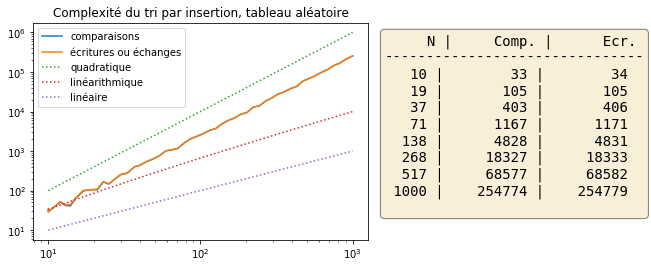

In [13]:
asd1.evalue_complexite(tri_par_insertion, 
                       asd1.tableau_aleatoire, 
                       "tri par insertion, tableau aléatoire")

Notons que 

* le nombre de comparaisons et d'écritures est quasiment égal (\*).

* leur complexité est d'ordre **quadratique en $\Theta(n^2)$** pour trier $n$ éléments. 

* le nombre exact de comparaisons varie, sans doute en fonction du contenu du tableau

(\*) *La seule différence provient des rares fois ou la boucle `while` s'arrête sur le test `i>0` et ne teste pas `comparer(tmp,T[i-1])` par court-circuit*

Vérifions cette dernière hypothèse en triant un **tableau déjà trié**

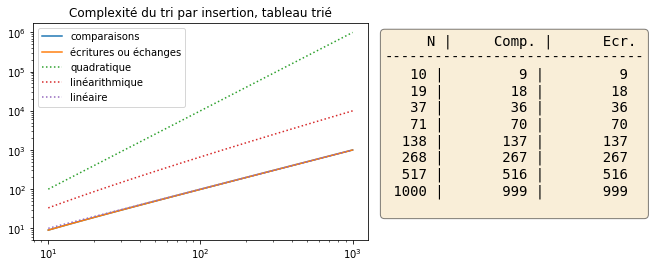

In [14]:
asd1.evalue_complexite(tri_par_insertion, asd1.tableau_trie, 
                       "tri par insertion, tableau trié")

La complexité est **linéaire** en $\Theta(n)$. Le test `comparer(tmp,T[i-1])` renvoye toujours `False`. C'est **le meilleur cas** pour le tri par insertion. 

Observons maintenant le cas inverse d'une entrée triée à l'envers

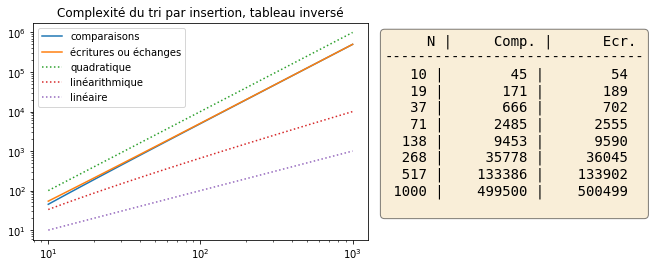

In [15]:
asd1.evalue_complexite(tri_par_insertion, 
                       asd1.tableau_trie_inverse, 
                       "tri par insertion, tableau inversé")

La complexité est ici **quadratique** en $\Theta(n^2)$. C'est **le pire cas**. 

Regardons enfin un cas d'importance pratique, celui d'un tableau **presque trié**. Ecrivons d'abord une fonction générant un tel tableau.

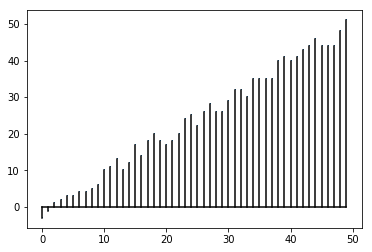

In [16]:
import numpy as np; import matplotlib.pyplot as plt

def tableau_presque_trie(n):
    return [ i + np.random.randint(-3,3) for i in range(0,n) ]
    
plt.stem(tableau_presque_trie(50),markerfmt=',',linefmt='black',basefmt='black')
plt.show()

Utilisons cette fonction pour évaluer une dernière fois la complexité du tri par insertion

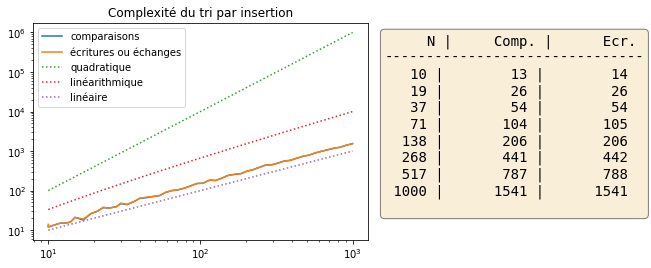

In [17]:
asd1.evalue_complexite(tri_par_insertion, tableau_presque_trie, 
                       "tri par insertion")

La complexité est ici approximativement linéaire en $\Theta(n)$. 

La fonction de génération de tableau presque trié utilisée ici garantit qu'aucun élément n'est à plus de 5 places de sa position finale. 

La boucle interne itère au maximum 5 fois.

Le tri par insertion est remarquablement efficace pour trier un tableau *presque* trié. 

A quel point il est efficace en pratique dépend évidemment de ce que l'on entend par *presque*

## Stabilité

Le tri par insertion est **stable**. 

En effet, le test `tmp < T[i-1]` garantit qu'on ne déplace pas vers la droite un élément égal à celui que l'on cherche à insérer. **L'ordre des éléments égaux est donc préservé**. 

Vérifions le graphiquement en triant par parties fractionnaires puis entières. 


Le tri est stable


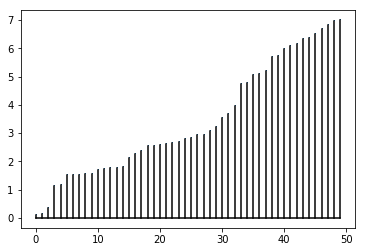

In [19]:
asd1.test_stabilite(tri_par_insertion)

Notons que le test strict `tmp < T[i-1]` est essentiel à la stabilité. Remplacer le test `tmp <= T[i-1]`, ou  `not( T[i-1] < tmp )` rend le tri instable

In [20]:
def tri_par_insertion_errone(T,plus_petit):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        i = k
        while i > 0 and not plus_petit(T[i-1],tmp):
            T[i] = T[i-1]
            i -= 1
        T[i] = tmp


Le tri n'est pas stable


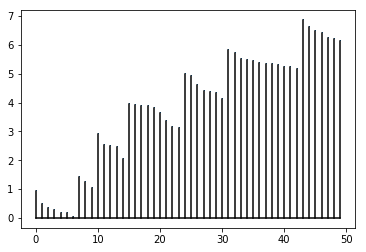

In [21]:
asd1.test_stabilite(tri_par_insertion_errone)

## Visualisation

Finalement, visualisons graphiquement le tri d'un tableau de 20 entiers aléatoires entre 0 et 100

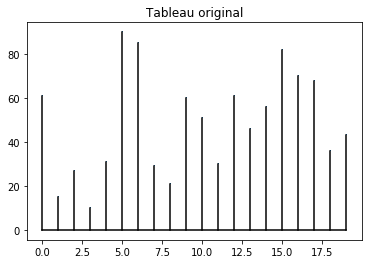

In [29]:
T = np.random.randint(0,100,20)
asd1.afficheIteration(T,'Tableau original')

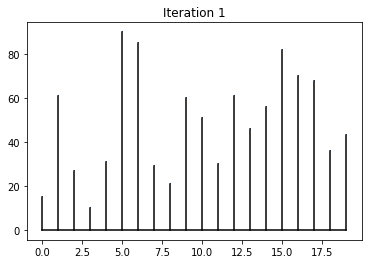

In [30]:
i = 1
inserer_un_element(T,i)
asd1.afficheIteration(T,'Iteration {0}'.format(i))

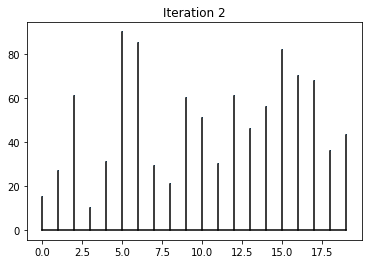

In [31]:
i += 1
inserer_un_element(T,i)
asd1.afficheIteration(T,'Iteration {0}'.format(i))

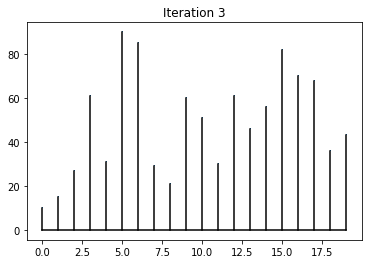

In [32]:
i += 1
inserer_un_element(T,i)
asd1.afficheIteration(T,'Iteration {0}'.format(i))

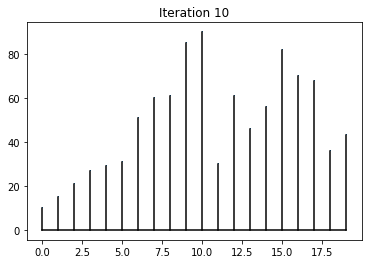

In [33]:
for k in range(7): 
    i += 1
    inserer_un_element(T,i)
asd1.afficheIteration(T,'Iteration {0}'.format(i))

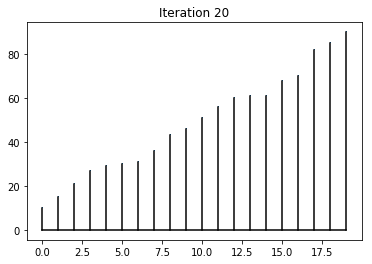

In [34]:
while i < len(T):
    inserer_un_element(T,i)
    i += 1
asd1.afficheIteration(T,'Iteration {0}'.format(i))

## Visualisation 2

Visualisons une itération sur 7 du tri de 50 entiers alétatoires entre 0 et 100. 

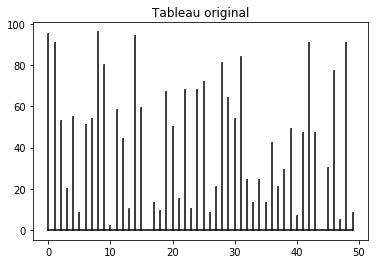

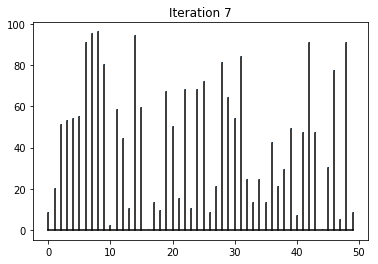

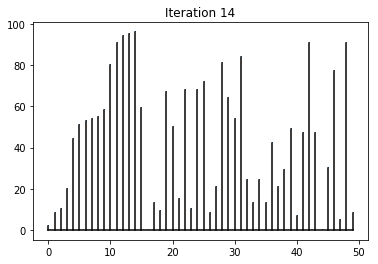

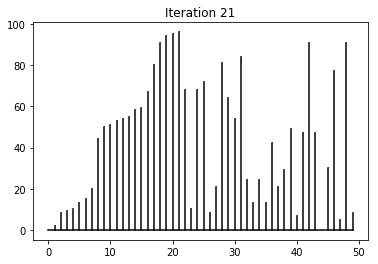

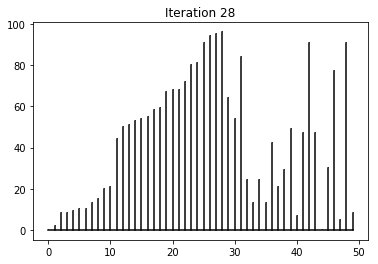

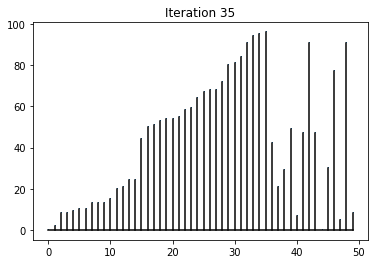

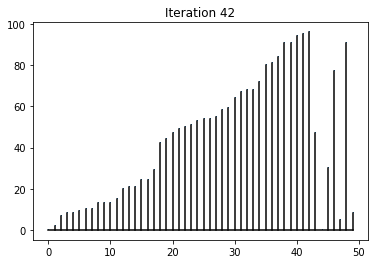

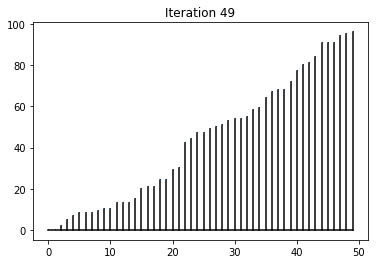

In [35]:
asd1.visualisation_tri_par_insertion()

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>